In [236]:
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

In [232]:
def parse_input(path):
    with open(path, 'r') as f:
        lines = f.readlines()
        B, L, D = lines[0].strip().split(' ')
        book_scores = lines[1].strip().split(' ')
        book_scores = list(map(lambda x: int(x), book_scores))
        libraries = []
        for i in range(int(L)):
            N, T, M = lines[2+i*2].strip().split(' ')
            N, T, M = list(map(lambda x: int(x), [N,T,M]))
            books = lines[2+i*2+1].strip().split(' ')
            books = list(map(lambda x: int(x), books))
            score_total = 0
            share_total = 0
            for b in books:
                score_total += book_scores[b]
                
            libraries.append({'id': i, 'N':N,'T':T,'M':M, 
                              'books':books,
                              'score_total': score_total,
                              'score_del_t': score_total / T,
                              'score_del_book': score_total / N})
                
    return B,L,D,book_scores,libraries

In [170]:
B, L, D, scores, libs = parse_input('data/a_example.txt')
print(B,L,D)
print(scores)
print(libs)

6 2 7
[1, 2, 3, 6, 5, 4]
[{'id': 0, 'N': 5, 'T': 2, 'M': 2, 'books': [0, 1, 2, 3, 4], 'score_total': 17, 'mean_score': 3.4}, {'id': 1, 'N': 4, 'T': 3, 'M': 1, 'books': [0, 2, 3, 5], 'score_total': 14, 'mean_score': 3.5}]


# Data analyses

In [259]:
files = {
    'a': 'a_example',
    'b': 'b_read_on',
    'c': 'c_incunabula',
    'd': 'd_tough_choices',
    'e': 'e_so_many_books',
    'f': 'f_libraries_of_the_world'
}

dataset = 'e'
B, L, D, scores, libs = parse_input('data/' + files[dataset] + '.txt')
print(B,L,D)

100000 1000 200


In [235]:
libs[0].keys()

dict_keys(['id', 'N', 'T', 'M', 'books', 'score_total', 'score_del_t'])

Scores:


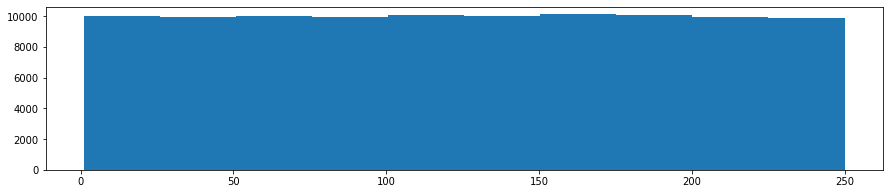

In [260]:
# Scores
print('Scores:')
plt.figure(figsize=(15,3))
plt.hist(scores)
plt.show()

Num of books:


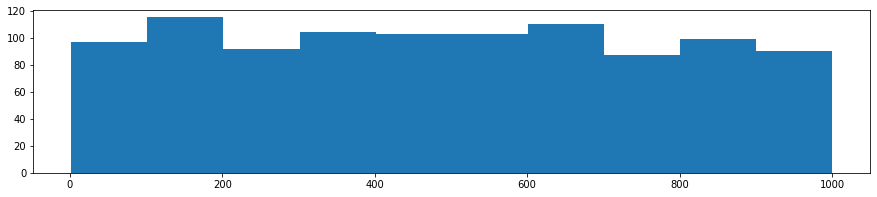

Times: 5432


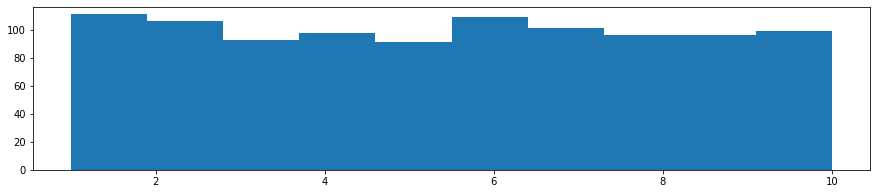

Freqs:


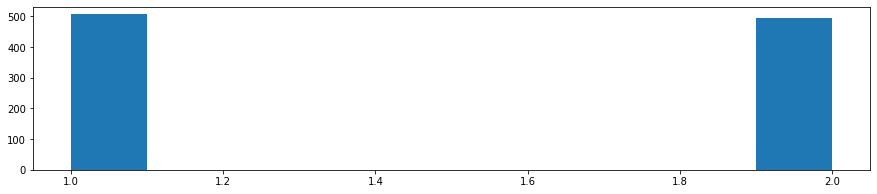

In [261]:
# Libraries
volumes = []
times = []
freqs = []
for l in libs:
    volumes.append(l['N'])
    times.append(l['T'])
    freqs.append(l['M'])

print('Num of books:')
plt.figure(figsize=(15,3))
plt.hist(volumes)
plt.show()
print('Times:', sum(times))
plt.figure(figsize=(15,3))
plt.hist(times)
plt.show()
print('Freqs:')
plt.figure(figsize=(15,3))
plt.hist(freqs)
plt.show()

In [122]:
def get_book_score(book_id: int):
    return scores[book_id]

def sort_books_by_score(books: list):
    return sorted(books, key=(lambda b: get_book_score(b)), reverse=True)

# Strategies

In [292]:
libs_temp = []
used_books = set()

with open(dataset + '_out.txt', 'w') as f:
    if dataset == 'b':
        f.write(str(L) + '\n')
        libs_temp = sorted(libs, key=(lambda l: l['T']))
        for lib in libs_temp:
            books = set(lib['books'])
            books = books - used_books
            used_books = used_books.union(books)
            
            books = sorted(list(books), key=(lambda b: get_book_score(b)), reverse=True)
            books = list(map(lambda b: str(b), books))
            f.write(str(lib['id']) + ' ' + str(len(books)) + '\n')
            f.write(' '.join(books) + '\n')
            
    elif dataset == 'c':
        f.write(str(L) + '\n')
        libs_temp = sorted(libs, key=(lambda l: l['T']))   
        libs_temp[:2000] = sorted(libs_temp[:2000], key=(lambda l: l['score_total']), reverse=True)
        i = 0
        for lib in libs_temp:
            books = set(lib['books'])
#             books = books - used_books
#             used_books = used_books.union(books)
            
            books = list(books)
            if books == []:
                continue
            
            books = sorted(books, key=(lambda b: get_book_score(b)), reverse=True)
            books = list(map(lambda b: str(b), books))
            
            f.write(str(lib['id']) + ' ' + str(len(books)) + '\n')
            f.write(' '.join(books) + '\n')
            i+=1
            
        print(i)
        
    elif dataset == 'd':
        libs_temp = sorted(libs, key=(lambda l: l['N']), reverse=True)
        f.write(str(L) + '\n')
        
        for lib in libs_temp:
            books = lib['books']
            books = sorted(books, key=(lambda b: get_book_score(b)), reverse=True)
            books = list(map(lambda b: str(b), books))
            f.write(str(lib['id']) + ' ' + str(len(books)) + '\n')
            f.write(' '.join(books) + '\n')
            
    elif dataset == 'e':
        libs_temp = [l for l in libs if l['M'] > 1]
        libs_temp = sorted(libs_temp, key=(lambda l: l['score_del_t']), reverse=True)
        f.write(str(len(libs_temp)) + '\n')
        
        for lib in libs_temp:
            books = lib['books']
            books = sorted(books, key=(lambda b: get_book_score(b)), reverse=True)
            books = list(map(lambda b: str(b), books))
            f.write(str(lib['id']) + ' ' + str(len(books)) + '\n')
            f.write(' '.join(books) + '\n')
        
print('done')

done


In [293]:
total = 0
for l in libs_sorted[:200]:
    total += l['score_total']
    
total

158535

In [245]:
libs_temp = sorted(libs, key=(lambda l: l['M']), reverse=True)
libs_temp[0]['M']

99998

In [206]:
libs[0].keys()

dict_keys(['id', 'N', 'T', 'M', 'books', 'score_total', 'score_del_t'])

In [177]:
for x in sorted(libs, key=(lambda x: x['M']), reverse=True)[:10]:
    print(x['M'])

2
2
2
2
2
2
2
2
2
2


In [196]:
len(used_books)

100000

In [198]:
B

'100000'